In [2]:
import matplotlib.pyplot as plt
import numpy as np

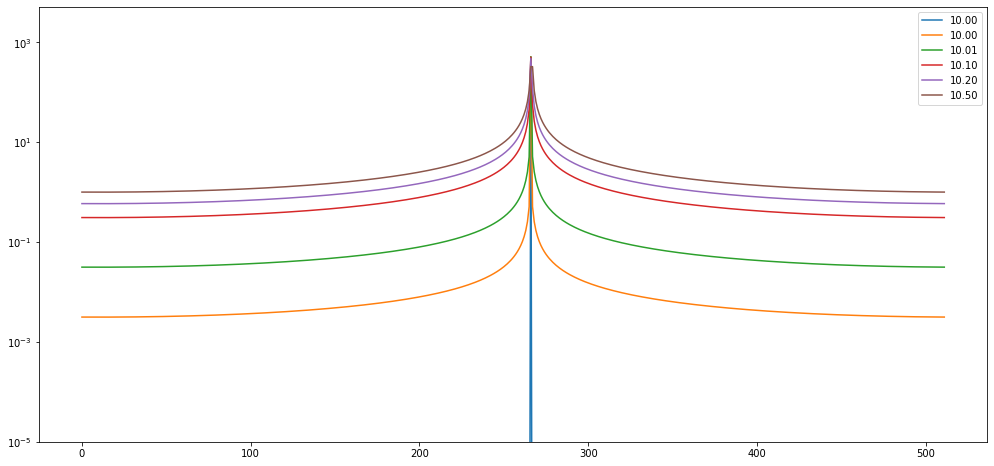

In [3]:
plt.figure(figsize=(17,8))

N = 512
t = np.linspace(0, 1, N, endpoint=False)

for f in [10,10.001,10.01,10.1,10.2,10.5]:
    s = np.exp(1j*2*np.pi * f * t)
    F = np.fft.fftshift(np.fft.fft(s))
    plt.semilogy(np.abs(F), label="%.2f" % f)

plt.ylim(1e-5, 10*N)
plt.legend()
plt.show()

In [4]:
Nshifts = 10_000

shifts = np.linspace(-4, +4, Nshifts)
left = np.zeros_like(shifts, dtype=np.complex128)
right = np.zeros_like(shifts, dtype=np.complex128)

for index in range(Nshifts):
    fbase = 100
    
    N = 512
    f = fbase + shifts[index]
    t = np.linspace(0, 1, N, endpoint=False)
    s = np.exp(1j*2*np.pi * f * t)
    F = np.fft.fft(s) / N

    left[index] = F[fbase+0]
    right[index] = F[fbase+1]

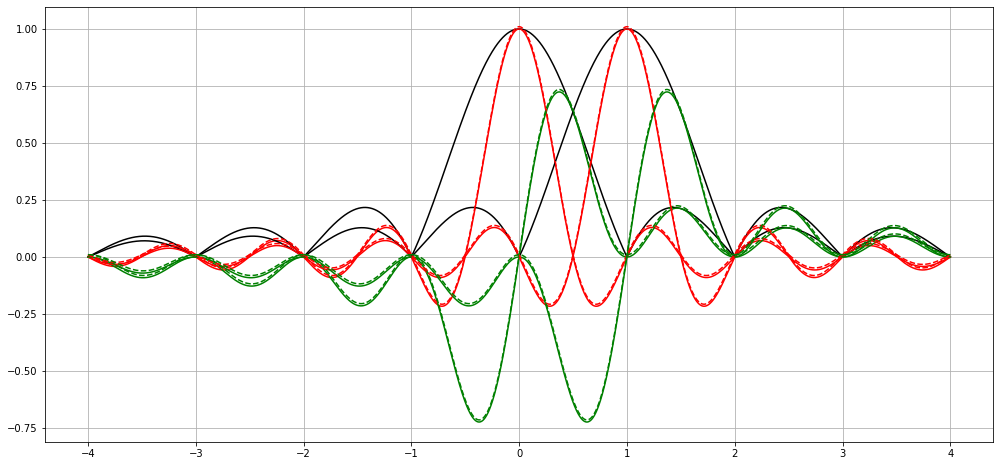

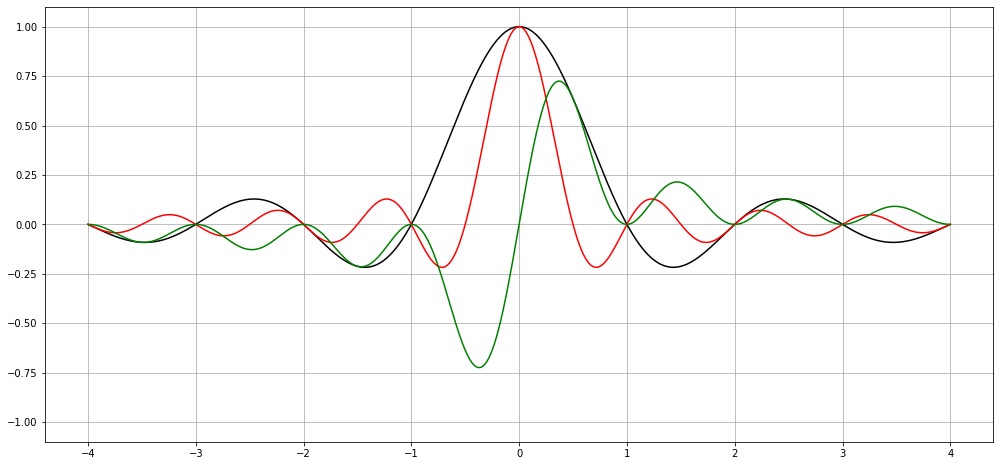

In [5]:
plt.figure(figsize=(17,8))
plt.plot(shifts, np.abs(left), c="k")
plt.plot(shifts, np.real(left), c="r")
plt.plot(shifts, np.imag(left), c="g")

plt.plot(shifts, np.abs(right), c="k")
plt.plot(shifts, np.real(right), c="r")
plt.plot(shifts, np.imag(right), c="g")

plt.plot(shifts, 0.01+np.sinc(shifts) * np.cos(1*np.pi*shifts), c="r", ls="--")
plt.plot(shifts, 0.01+np.sinc(shifts) * np.sin(1*np.pi*shifts), c="g", ls="--")

shifts2 = shifts-1
plt.plot(shifts, 0.01+np.sinc(shifts2) * np.cos(1*np.pi*shifts2), c="r", ls="--")
plt.plot(shifts, 0.01+np.sinc(shifts2) * np.sin(1*np.pi*shifts2), c="g", ls="--")

plt.grid("both")

plt.show()

plt.figure(figsize=(17,8))
plt.plot(shifts, np.sinc(shifts), c="k")
plt.plot(shifts, np.sinc(shifts) * np.cos(1*np.pi*shifts), c="r")
plt.plot(shifts, np.sinc(shifts) * np.sin(1*np.pi*shifts), c="g")
plt.ylim(-1.1, +1.1)
plt.grid("both")
plt.show()

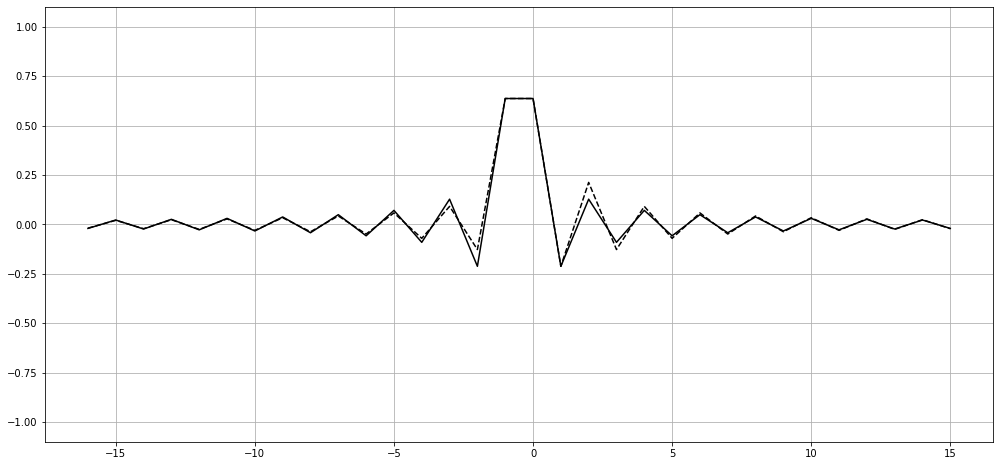

In [6]:
plt.figure(figsize=(17,8))

shift = -0.5

x = np.arange(-16, +16) # np.linspace(-8, +8, 10_000)
x0 = np.argmax(x==0)
f = np.sinc(x-shift)

def ebasis(off):
    b = np.sinc(x-0.5-off)
    b[x0+off-1] = 0
    b[x0+off  ] = 0
    b[x0+off+1] = 0
    return b #/ b[x0+off-1]

a = np.zeros_like(f)
a[x0-1] = f[x0-1]
a[x0  ] = f[x0  ]
a[x0+1] = f[x0+1]

a += -1*ebasis(0)

plt.plot(x, f, c="k")
#plt.plot(x, f1, c="r")
#plt.plot(x, f2, c="g")
plt.plot(x, a, c="k", ls="--")
plt.ylim(-1.1, +1.1)
plt.grid("both")
plt.show()

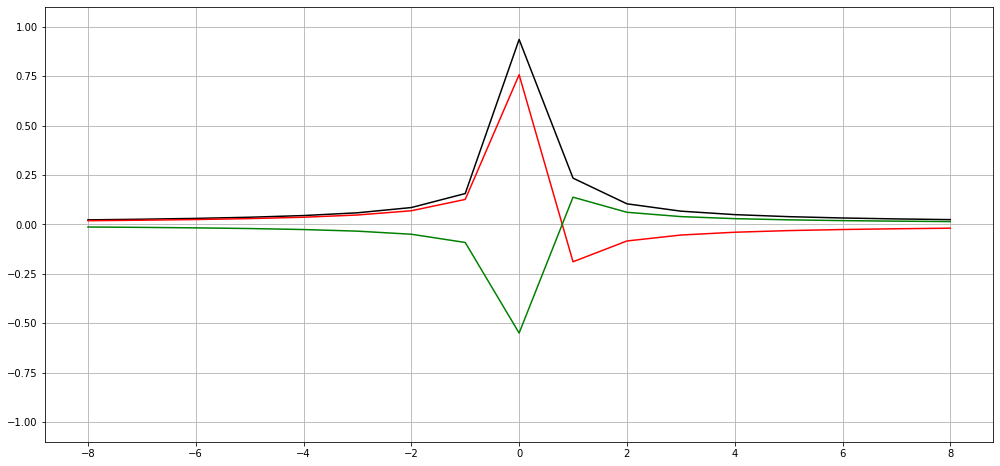

In [19]:
#s = np.linspace(-8, +8, 1_000)
s = np.arange(-8, +9)
shift = 0.2

v = np.sinc(s - shift) * np.exp(1j * np.pi * (s - shift))

plt.figure(figsize=(17,8))
plt.plot(s, np.abs(v), c="k")
plt.plot(s, np.real(v), c="r")
plt.plot(s, np.imag(v), c="g")
plt.ylim(-1.1, +1.1)
plt.grid("both")
plt.show()

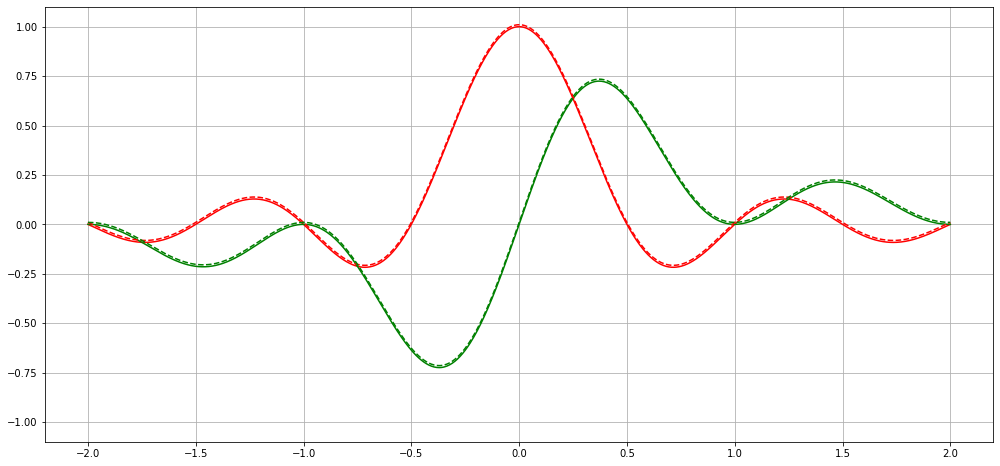

In [32]:
s = np.linspace(-2, 2, 1_000)

v = np.sinc(s) * np.exp(1j * np.pi * s)
v2 = (np.exp(2j * np.pi * s) - 1) / (2j * np.pi * s)

plt.figure(figsize=(17,8))
plt.plot(s, np.real(v), c="r")
plt.plot(s, np.imag(v), c="g")
plt.plot(s, np.real(v2) + 0.01, c="r", ls="--")
plt.plot(s, np.imag(v2) + 0.01, c="g", ls="--")
plt.ylim(-1.1, +1.1)
plt.grid("both")
plt.show()

4.329780281177466e-17


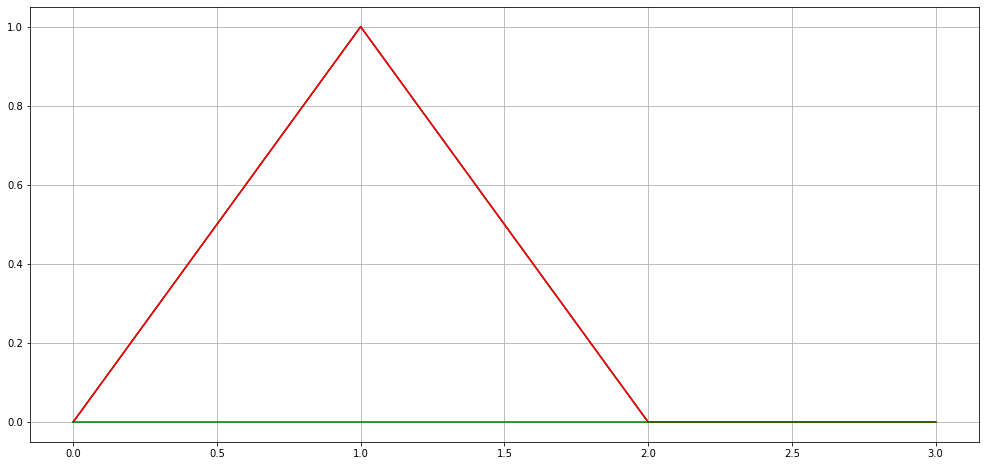

In [54]:
t = np.linspace(0, 1, 4, endpoint=False)
x = np.exp(2j*np.pi*t * 1.00)

F = np.fft.fft(x) / 4
Fa = np.abs(F)
e = np.abs(Fa[2]/(Fa[1] + Fa[2]))
print(e)

plt.figure(figsize=(17,8))
plt.plot(np.abs(F) , c="k")
plt.plot(np.real(F), c="r")
plt.plot(np.imag(F), c="g")
plt.grid("both")
plt.show()